<a href="https://colab.research.google.com/github/remanx2558/MIDBReviews/blob/master/FastText_HAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from gensim.models import KeyedVectors


In [2]:
reviews_df = pd.read_csv(r"/content/drive/My Drive/malia/train.csv")
reviews_df.isnull().values.any()
reviews_df.sentiment= reviews_df.sentiment.fillna(0.0).astype(int)#this will conver float into int and also manage missing values

print(reviews_df.dtypes)

text         object
sentiment     int64
dtype: object


data import and preprocess

In [44]:
import pandas as pd
import numpy as np


movie_reviews = pd.read_csv(r"/content/drive/My Drive/malia/train.csv")

movie_reviews.isnull().values.any()
movie_reviews.sentiment= movie_reviews.sentiment.fillna(0.0).astype(int)#this will conver float into int and also manage missing values

movie_reviews.shape

(25005, 2)

In [45]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [46]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [47]:
reviews = []
sentences = list(movie_reviews['text'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [48]:
movie_reviews['text'] = reviews

In [49]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(movie_reviews['text'])
sequences = tokenizer.texts_to_sequences(movie_reviews['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 73268 unique tokens.
Shape of data tensor: (25005, 1000)
Shape of label tensor: (25005, 2, 2)


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)



In [ ]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

In [51]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS=500
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.vocab:
      embedding_vector = model_ft[word]
      embedding_vector = np.array(embedding_vector)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

Preparing embedding matrix.fast text
(500, 300)


In [52]:
movie_reviews.shape

(25005, 2)

In [80]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [81]:
reviews = reviews_df['text'].values


In [82]:
cleaned_reviews = [clean(r) for r in reviews] 


In [83]:
reviews_df['text'] = cleaned_reviews


In [84]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
reviews = reviews_df['text'].values
reviews_text = []

for p in zip(reviews) : 
        reviews_text.append(p)

In [85]:
training_df = reviews_df.loc[:10000]
reviews_filtered = training_df['text'].values
training_reviews = reviews_df['text']
labels = reviews_df['sentiment']


In [86]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [87]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [88]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [89]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [90]:
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

#EMBEDDING_DIM = 300
#MAX_NUM_WORDS=500

In [91]:
sentiment_df = sentiment_df.dropna()#this is movie data set complete
sentiment_df = sentiment_df.reset_index(drop=True)
print('Shape of dataset ',sentiment_df.shape)
print(sentiment_df.columns)
print('No. of unique classes',len(set(sentiment_df['labels'])))

Shape of dataset  (25005, 2)
Index(['reviews', 'labels'], dtype='object')
No. of unique classes 2


In [92]:
 import nltk
 from nltk import tokenize

 reviews = []
 labels = []
 texts = []

In [93]:
macronum=sorted(set(sentiment_df['labels']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

In [94]:
def fun(i):
    return macro_to_id[i]

sentiment_df['labels']=sentiment_df['labels'].apply(fun)

In [95]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
for i in range(movie_reviews.text.shape[0]):
    text = BeautifulSoup(movie_reviews.text[i])
    text=clean_str(str(text.get_text().encode()).lower())
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    reviews.append(sentences)


for i in movie_reviews['sentiment']:
    labels.append(i)

In [97]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

for i, sentences in enumerate(reviews):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and tokenizer.word_index[word]<MAX_NB_WORDS:
                    data[i,j,k] = tokenizer.word_index[word]
                    k=k+1

In [98]:
word_index = tokenizer.word_index
print('No. of %s unique tokens.' % len(word_index))

No. of 75919 unique tokens.


In [99]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
#labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

Shape of data tensor: (25005, 15, 100)
Shape of label tensor: (25005, 2)


In [100]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [101]:
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

text_reviews = [str(r) for r in movie_reviews['text'].values]
sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, size=128)
words = list(embeddings_model.wv.vocab)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

73268 WORDS 
Printing first 100:
['for', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'lot', 'of', 'memorable', 'quotes', 'listed', 'this', 'gem', 'imagine', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'scene', 'stealer', 'the', 'moroni', 'character', 'an', 'absolute', 'scream', 'watch', 'alan', 'skipper', 'hale', 'jr', 'as', 'police', 'sgt', 'bizarre', 'horror', 'filled', 'with', 'famous', 'faces', 'but', 'stolen', 'by', 'cristina', 'raines', 'later', 'tv', 'flamingo', 'road', 'pretty', 'somewhat', 'unstable', 'model', 'gummy', 'smile', 'who', 'slated', 'to', 'pay', 'her', 'attempted', 'suicides', 'guarding', 'gateway', 'hell', 'scenes', 'modeling', 'very', 'well', 'captured', 'mood', 'music', 'perfect', 'deborah', 'raffin', 'charming', 'pal', 'when', 'moves', 'into', 'creepy', 'brooklyn', 'heights', 'brownstone', 'inhabited', 'blind', 'priest', 'on', 'top', 'floor', 'things', 'really', 'start']


In [ ]:
!wget https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
!unzip wiki-news-300d-1M.vec.zip

In [27]:
model_ft = KeyedVectors.load_word2vec_format('/content/drive/My Drive/malia/wiki-news-300d-1M.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [102]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS=75920
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.vocab:
      embedding_vector = model_ft[word]
      embedding_vector = np.array(embedding_vector)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)



embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=True)        

Preparing embedding matrix.fast text
(75920, 300)


In [103]:
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(LSTM(128))(embedded_sequences)
sentEncoder = Model(sentence_input, l_lstm)

review_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(LSTM(128))(review_encoder)
preds = Dense(len(macronum), activation='softmax')(l_lstm_sent)
model = Model(review_input, preds)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Hierachical LSTM")
model.summary()

Hierachical LSTM
Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 15, 100)]         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 256)           23215296  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 23,610,050
Trainable params: 23,610,050
Non-trainable params: 0
_________________________________________________________________


In [108]:
cp=ModelCheckpoint('model_han_.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=6, batch_size=2,callbacks=[cp])

Epoch 1/6
10002/10002 [==============================] - ETA: 0s - loss: 0.6648 - acc: 0.6251
Epoch 00001: val_acc improved from -inf to 0.08778, saving model to model_han_.hdf5
10002/10002 [==============================] - 928s 93ms/step - loss: 0.6648 - acc: 0.6251 - val_loss: 0.8998 - val_acc: 0.0878
Epoch 2/6
10002/10002 [==============================] - ETA: 0s - loss: 0.6500 - acc: 0.6431
Epoch 00002: val_acc did not improve from 0.08778
10002/10002 [==============================] - 938s 94ms/step - loss: 0.6500 - acc: 0.6431 - val_loss: 1.2526 - val_acc: 0.0416
Epoch 3/6
10002/10002 [==============================] - ETA: 0s - loss: 0.6040 - acc: 0.6909
Epoch 00003: val_acc improved from 0.08778 to 0.39892, saving model to model_han_.hdf5
10002/10002 [==============================] - 939s 94ms/step - loss: 0.6040 - acc: 0.6909 - val_loss: 0.8100 - val_acc: 0.3989
Epoch 4/6
10002/10002 [==============================] - ETA: 0s - loss: 0.5375 - acc: 0.7442
Epoch 00004: val_ac

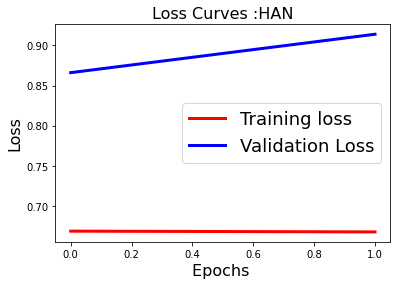

In [105]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :HAN',fontsize=16)
fig1.savefig('loss_han.png')
plt.show()

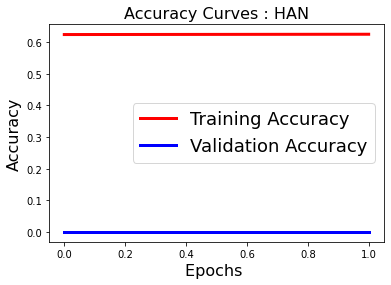

In [106]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : HAN',fontsize=16)
fig2.savefig('accuracy_han.png')
plt.show()

FileNotFoundError: ignored